<a href="https://colab.research.google.com/github/Yanhuijun1911/PythonData/blob/main/7_1_Visualisation_with_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing data visually
---

There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.

To keep it relatively simple, we will use **matplotlib**, a widely used library with a wide range of visualisation functions for data sets and mathematical equations.  It has the main functions we will use in this course:
*  bar charts
*  pie charts
*  line plots
*  box plots
*  scatter plots
*  histogram

Each requires these things:  
1. Select the data columns to be plotted 
2. Prepare the data (remove null values, clean formats, etc)  
3. Run the function for the required plot

Once you have the hang of these, you can start to look at labelling, colouring, etc.

In order to begin creating visualisations, you need to:  
* import **matplotlib** as **plt**

Test output for Exercises 1 to 7 is in this [image](https://drive.google.com/file/d/1yuuDSBI2gES2ipRWTa8XAycNqVd2Eqov/view?usp=sharing)

# IMPORTANT
---
There has been an upgrade to a library needed for reading Excel files in a notebook.  To ensure that you have this upgrade, run the code in the cell below and then select 'Restart runtime' from the Runtime menu.

In [1]:
!pip install --upgrade openpyxl

     |████████████████████████████████| 242 kB 5.1 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


#  Bar charts and Line Plots
---

For these exercises, use the Excel data file:

'public-use-talent-migration' looking at sheet_name 'Country Migration'  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true 

**Example**:  

Watch the video [here](https://drive.google.com/file/d/1eNOy7fhkB2CSfVdb66kqB66qXfoPfOpd/view?usp=sharing) - demonstration of creating a bar chart using the `matplotlib` library `pyplot`.  Then have a go at creating it yourself.

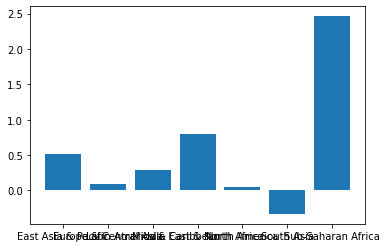

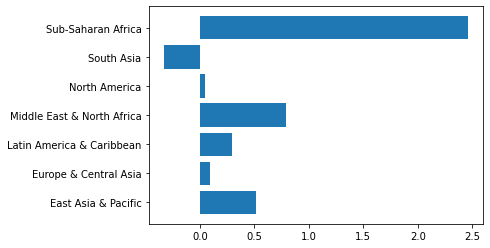

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="Country Migration")

regions = df.groupby(['base_country_wb_region']).mean()
data = regions["net_per_10K_2015"]
labels = data.keys()

plt.bar(labels, data)
plt.show()

plt.barh(labels, data)
plt.show()


### Exercise 1 - Line plot of net migration 
--- 

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings) 
* use plt.plot(x, y) to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting, then show the plot   

Rotate the x-axis labels in the plot:  
`plt.xticks(rotation=45)`  

Show the grid:  
`plt.grid()`  

When all formatting has been done, show the plot:   
`plt.show()`

In [25]:
regions

,base_lat,base_long,target_lat,target_long,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
base_country_wb_region,,,,,,,,,
East Asia & Pacific,8.944151,119.985600,26.465469,44.023868,0.512992,0.284632,0.142602,0.200256,0.198827
Europe & Central Asia,49.063574,12.499617,32.628260,22.534765,0.094688,0.037960,0.043296,0.133426,0.208974
Latin America & Caribbean,-2.279876,-74.048174,20.779738,-28.845214,0.296265,-0.262867,-0.603880,-0.894530,-0.904602
Middle East & North Africa,27.865578,39.705269,30.534102,29.090563,0.794564,0.126491,-0.196527,-0.017236,-0.107655
North America,45.628074,-100.481258,22.477511,19.483871,0.047063,0.106310,0.150714,0.201151,0.239246
South Asia,23.425757,77.968675,26.472768,39.616160,-0.330995,-0.492637,-0.693881,-0.504129,-0.514577
Sub-Saharan Africa,-5.063683,20.478221,23.138705,15.197579,2.461653,1.304390,-0.111220,-0.261463,-0.279729


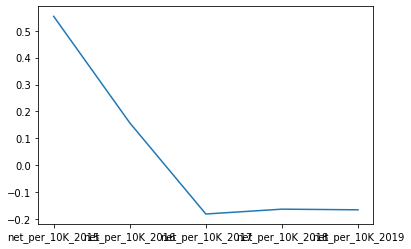

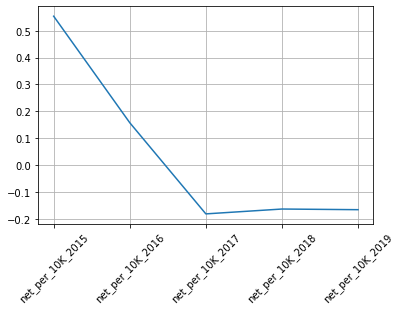

In [46]:
regions
five_net_migration = regions[["net_per_10K_2015","net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]]
five_net_migration
mean = five_net_migration.mean()
mean

mean_labels = mean.keys()
mean_labels

plt.plot(mean_labels, mean)
plt.show()

plt.plot(mean_labels, mean)
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Exercise 2 - Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  
 
* split the migration columns into a new dataframe
* create a data variable from the max() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart

***Presentation tips***:
* use plt.xlabel('Year') and plt.ylabel('Total net migration') to name your axis 
* display your bar graph with plt.show() 

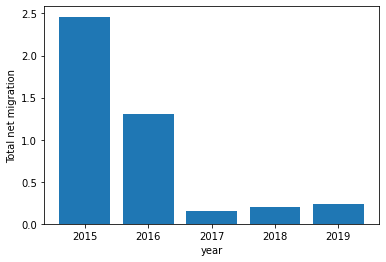

In [62]:
migration = regions[["net_per_10K_2015","net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]]
migration
max = migration.max()
max
labels = ['2015','2016','2017','2018','2019']


plt.bar(labels,max)
plt.xlabel("year")
plt.ylabel("Total net migration")
plt.show()

### Exercise 3 - creating a bar graph using grouped data 
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`' 
* extract your labels (x) using the .keys() function 
* use the plt.barh(x, y) to create a horizontal bar graph 
* add labels to the axes ('Year', 'Net Migration')  
* show the plot  

Try using plt.bar(x,y) - can you see why horizontally is more appropriate?

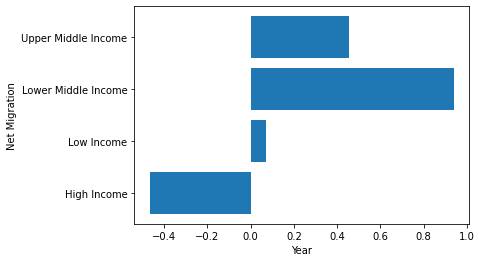

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="Country Migration")

income = df.groupby(["target_country_wb_income"]).mean()
income_2019 = income ["net_per_10K_2019"]

x = income_2019.keys()
y = income_2019
plt.barh(x,y)
plt.xlabel("Year")
plt.ylabel("Net Migration")
plt.show()

# Pie Charts, Box Plots, Scatter Plots and Histograms
---

For these exercises you will use the Psychology dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

To get the data ready:

* read csv file above and save into a new variable called `psych_data`

### Exercise 4 - Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to Exercise 2 - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called data
* extract your labels using the keys() function
* plot your pie chart using plt.pie(data, labels = labels)
* write a comment noting anything interesting about the visualisation




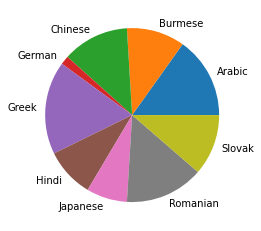

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data = pd.read_csv(url)
psych_data

first_language = psych_data.groupby(["firstlanguage"]).mean()
first_language

data = first_language["Stress"]
data

label = data.keys()
plt.pie(data,labels = label) #data, labels
plt.show()

### Exercise 5 - Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median. 

Create a box plot of the Wellbeing scores

*  split off the wellbeing column  
*  use plt.boxplot(data, labels=["Wellbeing"]) to create the boxplot 
*  show the boxplot

In [83]:
first_language

,Age,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
firstlanguage,,,,,,,,,,
Arabic,23.000000,0.000000,3.600000,36.500000,18.000000,28.000000,15.500000,13.000000,21.000000,2017.0
Burmese,26.000000,0.000000,4.130000,26.000000,20.000000,20.000000,18.000000,20.000000,24.000000,2017.0
Chinese,24.333333,0.277778,3.333333,34.222222,23.555556,22.888889,18.222222,13.777778,18.777778,2017.0
German,26.000000,0.000000,2.600000,40.000000,36.000000,3.000000,28.000000,4.000000,26.000000,2017.0
Greek,24.000000,0.000000,4.000000,42.000000,30.000000,32.000000,19.000000,5.000000,22.000000,2017.0
Hindi,26.000000,2.000000,4.300000,41.000000,26.000000,17.000000,23.000000,9.000000,30.000000,2017.0
Japanese,29.000000,0.000000,4.600000,33.000000,27.000000,14.000000,24.000000,9.000000,16.000000,2017.0
Romanian,34.000000,5.000000,4.000000,34.000000,28.000000,27.000000,19.000000,20.000000,23.000000,2017.0
Slovak,23.000000,0.000000,4.100000,30.000000,26.000000,21.000000,22.000000,9.000000,29.000000,2017.0


In [87]:
Wellbeing = first_language["Wellbeing"]
Wellbeing


firstlanguage
Arabic      18.000000
Burmese     20.000000
Chinese     23.555556
German      36.000000
Greek       30.000000
Hindi       26.000000
Japanese    27.000000
Romanian    28.000000
Slovak      26.000000
Name: Wellbeing, dtype: float64

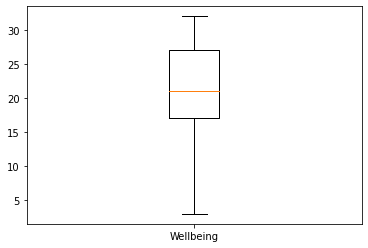

In [88]:
plt.boxplot(data, labels=["Wellbeing"])
plt.show()

### Exercise 6 - Histograms of  age 
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `plt.hist(data)` 
* add labels using `plt.xlabel()` and `plt.ylabel()`
* change the colours of the bars - try plt.hist(x, color = 'red')
* show the plot


In [91]:
Wellbeing

firstlanguage
Arabic      18.000000
Burmese     20.000000
Chinese     23.555556
German      36.000000
Greek       30.000000
Hindi       26.000000
Japanese    27.000000
Romanian    28.000000
Slovak      26.000000
Name: Wellbeing, dtype: float64

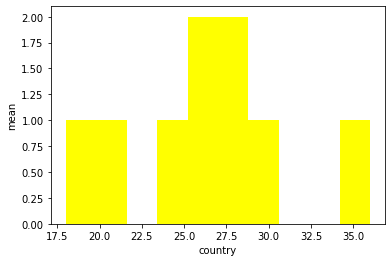

In [99]:
plt.hist(Wellbeing)
plt.xlabel("country")
plt.ylabel("mean")
plt.hist(Wellbeing, color = 'yellow')
plt.show()

### Exercise 7 - Create a scatterplot of Wellbeing and Stress with line of best fit
---

Assuming that Stress is fairly closely associated with Wellbeing:

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create *y* from the `Wellbeing` column
* use `plt.scatter(x,y)` to create a scatterplot
* add x axis and y axis labels using `plt.xlabel('Stress')` and `plt.ylabel('Wellbeing')`
*  

Adding a line of best fit:   
* the code cell below already has the linregress function imported from the scipy.stats library
* create a regression variable and assign the result of using linregress (`regression = linregress(x,y)` )
* store the slope and intercept (`slope = regression.slope`, `intercept = regression.intercept`)
* plot a line using `plt.plot(x, slope*x + intercept)` 

Show the plots.

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




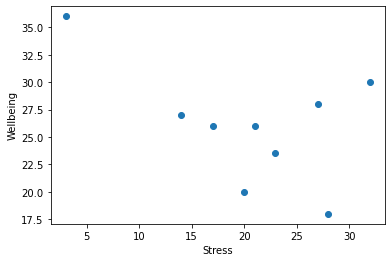

In [104]:
from scipy.stats import linregress

Stress = first_language["Stress"]
x = Stress
y = Wellbeing
plt.scatter(x,y)
plt.xlabel("Stress")
plt.ylabel("Wellbeing")
plt.show()

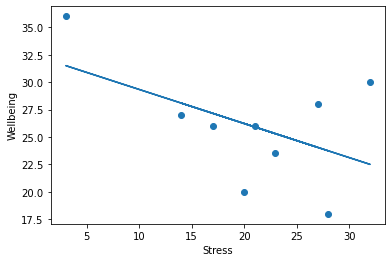

In [107]:
Stress = first_language["Stress"]
x = Stress
y = Wellbeing
plt.scatter(x,y)
plt.xlabel("Stress")
plt.ylabel("Wellbeing")

regression = linregress(x,y)
slope = regression.slope
intercept = regression.intercept  #intercept 截距 slope 坡度 scatter 分散
plt.plot(x, slope*x + intercept)
plt.show()

### Exercise 8 - Create a set of charts from a data set
---
Use the student exam scores dataset here: https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv

Investigate the data and create a set of charts.  

Create each chart in a new code cell.

Add a text cell below each visualisation to explain what the chart is showing.


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


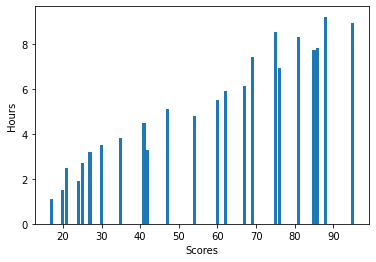

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/student_scores.csv"
df = pd.read_csv(url)
print(df)

x = df["Scores"]
y = df["Hours"]
plt.bar(x,y)
plt.xlabel("Scores")
plt.ylabel("Hours")
plt.show()

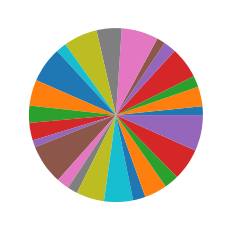

In [118]:
plt.pie(x)
plt.show()

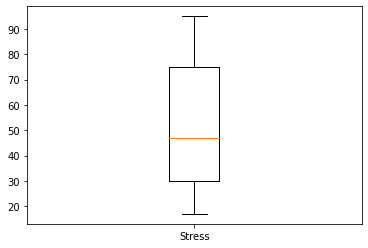

In [117]:
plt.boxplot(x, labels=["Stress"])
plt.show()

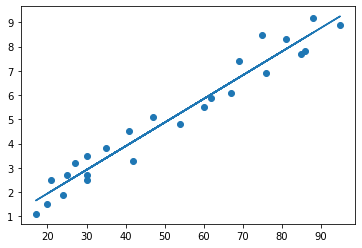

In [120]:
plt.scatter(x,y)

regression = linregress(x,y)
slope = regression.slope
intercept = regression.intercept  #intercept 截距 slope 坡度 scatter 分散
plt.plot(x, slope*x + intercept)

plt.show()

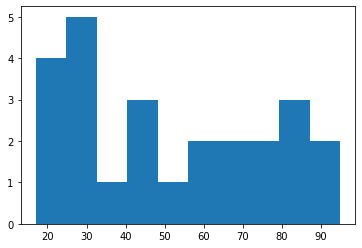

In [121]:
plt.hist(x)
plt.show()

# Further reference on w3schools

[Matplotlib on w3schools](https://www.w3schools.com/python/matplotlib_intro.**asp**)